# Which words change most in meaning over the _Sattelzeit_?

In [3]:
# Test BPO
from koselleck import *

In [4]:
# load decade level data
dfpiv_abs,dfpiv_freq = get_decade_level_data()
# load diff data by run
dfruns=pd.read_csv(FN_CHANGE_RUNS).set_index('word')
# Load diffdata avg
dfchange=get_dfchange()

In [8]:
gby=['class_abs','class_change']
dfchange[dfchange.class_signif==True].groupby(gby).size()

class_abs  class_change
+Abstract  +Changed        172
           -Changed        249
           ~Noisy           76
+Concrete  +Changed        163
           -Changed        223
           ~Noisy           86
Abs~Conc   +Changed        554
dtype: int64

In [9]:
def get_word_info(w):
    try:
        p9.options.figure_size=3,2
        p9.options.dpi=150
        figdf2=dfruns.loc[w].melt(value_vars=['score1_abstractness','score2_abstractness'], var_name='score_type')
        figdf2['year']=figdf2.score_type.apply(lambda x: 1750 if '1' in x else 1850)
        figdf2['variable']='abs'
#         figdf2=figdf2.drop('variable',1)
#         display(figdf2)
        
        #fig2=p9.ggplot(figdf2, p9.aes(y='value', x='variable')) + p9.geom_boxplot() + p9.geom_point() + p9.theme_classic() + p9.geom_hline(yintercept=0)
        #fig2+=p9.theme(text=p9.element_text(size=7))
        
        
        figdf=pd.DataFrame({'abs':dfpiv_abs.loc[w], 'freq':dfpiv_freq.loc[w]})
        figdf=figdf.reset_index().melt(id_vars=['year'],value_vars=['abs','freq'])

        fig=p9.ggplot(figdf, p9.aes(x='year',y='value'))#,color='variable'))
        fig+=p9.geom_boxplot(p9.aes(group='score_type'),data=figdf2,width=50)
        fig+=p9.geom_point(data=figdf2,size=.25)
        fig+=p9.geom_point(size=0.5,alpha=0.5)
        fig+=p9.geom_line(alpha=0.5)
        fig+=p9.facet_wrap('variable',scales='free_y')
        fig+=p9.theme_classic()
        fig+=p9.geom_hline(yintercept=0)
        fig+=p9.geom_hline(yintercept=-1,alpha=0)
        fig+=p9.geom_hline(yintercept=1,alpha=0)
        fig+=p9.labs(title=f'Relative abstractness and frequency of {w} over 1700-1900')
        fig+=p9.theme(text=p9.element_text(size=7))

        def neighb(nstr):
            return ' '.join(
                f'<u>**{x}**</u>' if not x[0].isalpha() and x[0]!='(' else x
                for x in nstr.split()
            )
        row=dfchange.loc[w]
        omd=f"""
## {w}
* **{int(row.perc_local)}%** (**{row.class_change}**) percentile for local semantic change (z={round(row.dist_local,2)})
* **{int(row.perc_abstractness)}%** (**{row.class_abs}**) percentile for magnitude change in abstractness (z={round(row.dist_abstractness,2)}): {round(row.score1_abstractness,2)} -> {round(row.score2_abstractness,2)}
* **{"Clean" if row.is_clean_noiseaware else "Noisy"}** result according to the noise aware data
* Its neighborhoods:

| Neighborhood 1 | Neighborhood 2 |
| -------------- | -------------- |
| {neighb(dfchange.loc[w].neighborhood1_local)} | {neighb(dfchange.loc[w].neighborhood2_local)} |
        """
        printm(omd)
        
#         display(fig2)
        display(fig)
    except Exception as e:
#         print(e)
        pass

In [10]:
dfchange.class_abs.value_counts()

Abs~Conc     3855
+Abstract     497
+Concrete     472
Name: class_abs, dtype: int64

In [11]:
interact(get_word_info, w='culture')

interactive(children=(Text(value='culture', description='w'), Output()), _dom_classes=('widget-interact',))

<function __main__.get_word_info(w)>

In [12]:
show_change_table(dfchange)

## +Abstract

|    | +Changed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           | -Changed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           | ~Noisy                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
|---:|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 | greed, regime, commune, feud, veto, thrift, advert, serf, budget, germ, draft, role, factor, clue, presentment, goodwill, labor, drill, mania, drawback, caring, meantime, boon, trait, herald, sob, chef, baton, informant, advent, cheque, accord, rite, spy, flaw, mater, celt, graduate, annoyance, recording, canning, retention, childe, stoppage, sect, endowment, retort, lecturer, viewing, pew, turkey, loathing, circus, longing, variance, negro, watt, lunatic, louse, folk, data, privation, threat, rote, rental, lifetime, workman, wail, guild, dwelling, ruler, grace, urge, semi, trench, thinker, culture, collation, congratulation, convulsion, repute, closing, par, cessation, transfer, largo, aid, duo, licensing, bey, enigma, watering, harp, communication, sharpness, incorporation, lending, ache, staff, seizure, derby, discouragement, debility, ven, consummation, renunciation, seer, sig, ballot, gurney, opium, charm, antiquarian, confiscation, blockade, occupation, breadth, bachelor, agitation, lunacy, viol, import, papacy, desertion, intrigue, barrack, collector, pith, patient, hostility, delineation, goldsmith, ego, mood, semblance, disaster, note, monday, gelding, auditor, workhouse, transformation, comp, deduction, ditty, solemnity, array, suppression, gilt, saturday, engineer, correction, detention, tsar, deal, milliner, school, symptom, cricket, manifesto, formula, rarity, vein, truce, duel, stab, destiny, imbecility, trash, lever, pilgrim, wednesday | bible, slack, gateway, china, moralist, tuesday, star, builder, banking, sine, haven, publican, irritability, operator, reckoning, scaffold, lodger, currency, reward, warehouse, stipend, thursday, parentage, music, taint, sneer, thrill, joke, craving, labourer, experiment, dissent, sphere, liver, value, friday, sib, epilogue, arrest, planter, tenant, recovery, canal, deception, flint, atlas, loot, fusion, penalty, sunday, ado, keel, prohibition, multiplication, theory, rider, reviewer, gauge, banker, proclamation, echo, churchman, dollar, accomplice, lip, rowing, area, allowance, layman, tinge, bombardment, appropriation, hobby, chairman, seminary, barony, landlord, bitch, follower, reformer, hook, enthusiast, yeoman, tariff, stagnation, hearer, art, checking, spice, shoemaker, illness, liter, coal, freehold, store, verge, martyrdom, stress, coquette, leech, advocate, stability, cross, bacon, goo, ointment, annihilation, cotton, regeneration, valuation, boy, liar, murder, explosion, refutation, apprentice, verdict, mill, guy, blight, axiom, rebuke, painter, shock, reservation, dick, laird, interpreter, democracy, politician, comment, license, biographer, canto, tenement, creed, lamb, bishopric, plaintiff, magnitude, sting, assent, niece, disorder, bloodshed, irritation, indictment, drawer, artist, staple, bolt, malignity, valve, week, lace, ear, infusion, vault, extinction, buckle, thesis, lint, stil, dock, burst, inaccuracy, baker, tile, exaggeration, condemnation, gall, malady, root, flash, pearl, devotion, oke, lout, menace, critique, cancer, bio, millet, weaver, depth, horn, tilt, cock, cellar, prosecutor, cup, canon, expansion, gentlewoman, drug, silt, parody, mortification, deacon, deer, whirlwind, consistency, tort, archdeacon, ire, phraseology, consecration, carpenter, oil, berry, chill, carelessness, coldness, nerve, suspicion, richness, genesis, tide, gunpowder, vocabulary, dean, populace, sadness, focus, distraction, tin, incarnation, acquittal, flesh, infidel, lag, weariness, exposition, pain, swine, judaism, synagogue, flavour, misrepresentation, believer, popery, fervour, frankness, inconsistency, violence, bird, fanaticism, blindness, butler | tact, lack, case, fun, goal, era, chant, dealing, finale, rise, contribution, healing, career, encore, mall, cloth, link, list, intelligence, trio, training, solo, site, league, duet, organ, missionary, position, organization, household, bass, bond, strand, crystal, transportation, violin, choir, chord, burglary, failure, recognition, code, attitude, temperament, musician, auction, movement, contact, habit, organist, element, conflict, problem, damage, tone, estimate, robbery, legislation, envoy, gallery, parcel, biography, desk, exchequer, madame, sympathy, walnut, vindication, platform, intellect, alias, utterance, warrant, cocoa, feeling, earnestness |

## +Concrete

|    | +Changed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     | -Changed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 | ~Noisy                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
|---:|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 | filter, modelling, frill, whore, ledge, legation, haze, numbering, vantage, demon, bouquet, truss, flue, forme, font, disc, rill, cess, contra, span, divan, craft, gig, heft, lass, tributary, rally, mule, zinc, lye, temperance, stool, uniform, punt, cider, allure, tank, desert, rime, tray, fog, recess, tuft, stew, strip, masonry, runner, greeting, terra, tress, jar, barrier, elf, leek, doctor, paving, ledger, mechanic, fare, packet, prow, exterior, helm, fern, bath, furnishing, cement, vest, hare, raft, tool, dye, ration, conveyance, trail, patentee, mystery, dill, pie, darling, player, puzzle, inlet, incline, ice, jade, doll, pail, neigh, pool, partition, tent, communicating, kilt, step, coil, thinking, base, manufactory, shadow, reptile, juncture, thistle, diver, prance, rake, log, jib, squirrel, cottage, margin, grit, cologne, jet, stretch, loading, truck, dive, magistrate, billet, lizard, hat, lather, monkey, affair, menu, inoculation, example, moving, tribune, applause, baud, labyrinth, curb, conversation, fan, jam, peat, stranger, brand, preservation, wick, rib, clearing, cone, novelty, dent, litter, pawn, tarn, brink, harlequin, profusion, business, lure, receptacle, occasion, chine, safety, knitting, consequence, companion, commoner | way, tweed, patch, perspiration, fairy, gent, dolphin, troop, vegetation, wile, herd, bale, administration, nabob, pantomime, gloss, texture, generality, bulwark, fragment, stem, fore, militia, frame, suffering, contrivance, attention, cob, establishment, flight, dress, removal, plantation, freight, party, relish, maze, slice, recommendation, hose, pursuit, curve, progeny, rind, skeleton, tick, distribution, thing, load, house, fen, equipage, deviation, pop, result, ornament, carpet, specimen, appearance, prop, plaid, nymph, silence, majesty, puff, spin, charge, thorn, herring, mirror, bucket, discovery, peerage, countenance, appellation, rust, stroke, monster, article, extremity, blemish, glare, wing, paper, combination, diadem, merit, fishery, yarn, side, blast, figure, rim, plunge, promise, light, reputation, oar, answer, packing, sea, protection, mound, neighbour, solitude, livery, wool, fluid, holly, foundation, event, species, kite, muck, lustre, irregularity, adversary, cove, dart, incense, instance, contract, rigging, wave, precipice, inducement, lump, precision, spray, patron, ting, destruction, prom, swarm, commonwealth, glory, heap, wretch, beggar, solidity, style, curling, sulphur, gentleman, shaft, finery, fur, activity, avenue, landing, leaf, coke, imp, wreath, ion, obscurity, kingdom, lath, circumstance, char, ingenuity, nut, queen, lance, steadiness, creek, quill, fuel, effect, caprice, mast, rat, compliance, practice, world, reflection, grandfather, excellence, intention, honour, pea, attachment, motion, cushion, fice, biscuit, soldiery, razor, perseverance, mug, dagger, flame, vee, inclination, beetle, throne, temptation, pear, indulgence, blessing, king, pique, impunity, wife, cot, regularity, gad, alacrity, mat, temerity, softness, happiness, deity, heaven, affection, reason, continuation, git, kindness, partiality, malice, superstition, misery | muff, mutt, fee, slate, conduit, stile, coon, fink, railing, fiend, nave, layer, ruffian, tenor, fence, loft, screen, jelly, filly, peak, belt, stall, fad, omnibus, concert, studio, accommodation, standing, rail, craftsman, hall, mud, regent, recital, haft, chat, weft, grub, station, sitting, tint, rifle, loon, hip, patent, pattern, moss, performance, reform, signature, junction, crown, visitor, exhibition, design, sofa, material, bell, mould, institution, completion, inspection, application, succession, vicinity, gravel, pub, popularity, mail, hive, destination, manufacturer, agency, disposal, exception, exertion, manager, series, glimpse, economy, cur, fort, pot, permission, bladder, sketch |

## Abs~Conc

|    | +Changed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
|---:|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 | employer, entirety, pallor, deficit, clutch, dating, fete, tome, prefect, fuss, trance, evacuation, hock, mover, annex, wage, confederation, thud, freak, asset, persona, sheen, prelude, vehicle, supporter, rendering, dole, pretension, tinder, mining, umpire, batter, monitor, forte, loop, score, dais, firm, mariner, gear, fitter, scrutiny, rating, reverie, tuition, foal, dispatch, scotch, substitute, reef, cornet, media, expert, notoriety, gorge, trip, host, poisoning, examiner, nursery, toilet, choosing, stair, verity, stud, effusion, adult, award, proximity, virtuoso, theme, correspondence, strait, presentation, sort, sign, diploma, scrip, attendant, discoverer, film, itch, transport, riddle, flock, miner, holder, assemblage, rehearsal, stake, ascendant, ringing, doc, housewife, mess, cairn, equipment, gem, transit, information, quest, rift, preferment, job, home, aide, demolition, remittance, toast, competitor, sedan, suspension, honor, exit, matrimony, aim, repair, corpus, victor, quadrille, arc, adventure, rouge, promotion, periodical, sport, intent, naming, recitative, monsieur, race, reprobation, toilette, sequence, remnant, repository, wanderer, minuet, churchyard, donor, idler, band, domain, guest, decline, humiliation, delegate, seam, exhaust, sire, passenger, stamp, carol, memorandum, roan, guide, absence, disuse, bidding, plea, cost, mist, attic, banquet, moat, delivery, spaniard, season, fife, relation, room, corpse, usage, trace, stance, basil, duct, coup, bar, diet, chatter, cabinet, counter, cub, waiter, function, deposition, hiring, lad, lust, guise, highland, extraction, simile, core, omen, genus, asylum, equivalent, liege, generation, spectator, twin, scat, signing, speed, curry, incredulity, treasure, card, posture, retribution, physic, vagrant, forum, advance, anticipation, survivor, balance, nuisance, congress, digest, rug, glen, loan, blackness, spa, plight, awe, foe, telling, apparition, homo, fellowship, toll, trump, greyhound, retirement, leopard, knack, usefulness, service, drawing, minster, sewer, flora, bank, twill, mitre, dancer, condition, electorate, playhouse, gutter, refreshment, gazette, remonstrance, hoard, ruby, prodigy, novice, nook, vent, part, advertiser, cent, opening, travel, criterion, directory, connoisseur, harpsichord, hum, performer, sham, web, cheapness, haste, mote, deficiency, row, fugitive, flute, chili, couple, salutation, extension, pet, exchange, tilth, tune, piper, transaction, concord, ticket, certificate, mermaid, stead, avail, gaming, survey, transition, jug, ally, subscriber, chance, dint, peril, notary, chivalry, term, temp, car, hail, otter, peasant, hug, bookseller, fraternity, glee, tribe, embryo, spark, brute, shift, medley, exhibit, inventor, resort, sway, kid, sooth, collateral, street, jubilee, boarding, halt, larder, demand, jail, trot, price, obstruction, papa, opera, gene, dutchman, sergeant, limo, task, beginner, ottoman, stoop, birthday, nursing, speculation, mag, potentate, lope, rest, heating, rape, hull, sprinkling, wardrobe, beck, intervention, salute, access, probation, prodigal, quid, watchman, abbe, fop, opus, pus, partnership, spending, supper, situation, shark, elocution, tartar, feu, tonnage, class, grudge, bight, scan, tiling, vacancy, minority, marl, rebus, vita, pedigree, champagne, volunteer, morrow, vogue, vole, marquess, examination, publishing, gathering, venture, din, query, whim, hearing, tug, navigation, wink, inauguration, sensation, coach, correspondent, capital, tavern, zenith, deposit, sample, steeple, team, wearer, date, wort, trumpet, traveller, cell, giver, sherry, chancel, necklace, mosaic, commendation, handling, attendance, lighting, guidance, tennis, legion, pane, domino, rood, abstinence, sage, pledge, fossil, society, gull, dispersion, carrier, scribe, paint, mister, relaxation, plot, tailor, vacation, ivy, strike, bourbon, fist, bench, riot, possessor, hermit, privacy, labour, warning, jig, fencing, leader, piracy, academy, renown, executive, toil, nap, hound, footing, abode, message, entry, hint, tablet, schedule, state, rout, dancing, taking, tally, gallantry, stage, search, irony, chime, ending, denomination, stationer, reduction, peal, miser, confederate, beginning, exam, informing, breed, maker, preserving, contingent, horizon, circle, readiness, miscellany, gesture, convention, waste, codex, navy, sandwich, peninsula, teacher, mark, precedence, character, writ, press, neutrality, galley, whisper, curiosity, weal, admittance, choice, luck, moor, compulsion, care, villa, suggestion, protest, block, bait, display, tithe, emphasis, emergency, sentence, troth, clown, jus |

In [13]:
interact(get_word_info, w='value')

interactive(children=(Text(value='value', description='w'), Output()), _dom_classes=('widget-interact',))

<function __main__.get_word_info(w)>

## Arrow plots

In [15]:
figdf=dfchange.reset_index().query(
#     'is_clean_noiseaware==True & class_abs!="Abs~Conc" & perc_abstractness>=90'#' & (score1_abstractness>0.5 | score2_abstractness>0.5)
#     'is_clean_noiseaware>0 & class_abs!="Abs~Conc" & (score1_abstractness>1 | score2_abstractness>1)'
    'class_abs!="Abs~Conc" & ((score1_abstractness>1 & score2_abstractness<1) | (score1_abstractness<1 & score2_abstractness>1))'
).query(
    'is_clean_noiseaware>0 & perc_local>0'
)
figdf=figdf.melt(id_vars=['word','perc_local','score_diff_abstractness','perc_abstractness','is_clean_noiseaware','class_abs'],
                 value_vars=['score1_abstractness','score2_abstractness'])
figdf=figdf.sort_values(['word','variable'], ascending=[1,1])
# figdf=pd.concat(g[1] for i,g in enumerate(figdf.groupby('word')) if len(g)==2)
figdf

,word,perc_local,score_diff_abstractness,perc_abstractness,is_clean_noiseaware,class_abs,variable,value
31,accord,96.522607,0.666903,87.247207,1.0,+Abstract,score1_abstractness,0.460368
185,accord,96.522607,0.666903,87.247207,1.0,+Abstract,score2_abstractness,1.127270
98,acquittal,16.033812,0.588736,83.197184,1.0,+Abstract,score1_abstractness,0.743021
252,acquittal,16.033812,0.588736,83.197184,1.0,+Abstract,score2_abstractness,1.331757
139,adversary,47.542261,-0.492317,76.458545,1.0,+Concrete,score1_abstractness,1.172371
...,...,...,...,...,...,...,...,...
164,viewing,94.694847,1.426521,98.981369,1.0,+Abstract,score2_abstractness,1.003894
153,violence,5.762067,0.576068,83.768623,1.0,+Abstract,score1_abstractness,0.531480
307,violence,5.762067,0.576068,83.768623,1.0,+Abstract,score2_abstractness,1.107548
150,world,33.420560,-0.545607,82.371679,1.0,+Concrete,score1_abstractness,1.303003


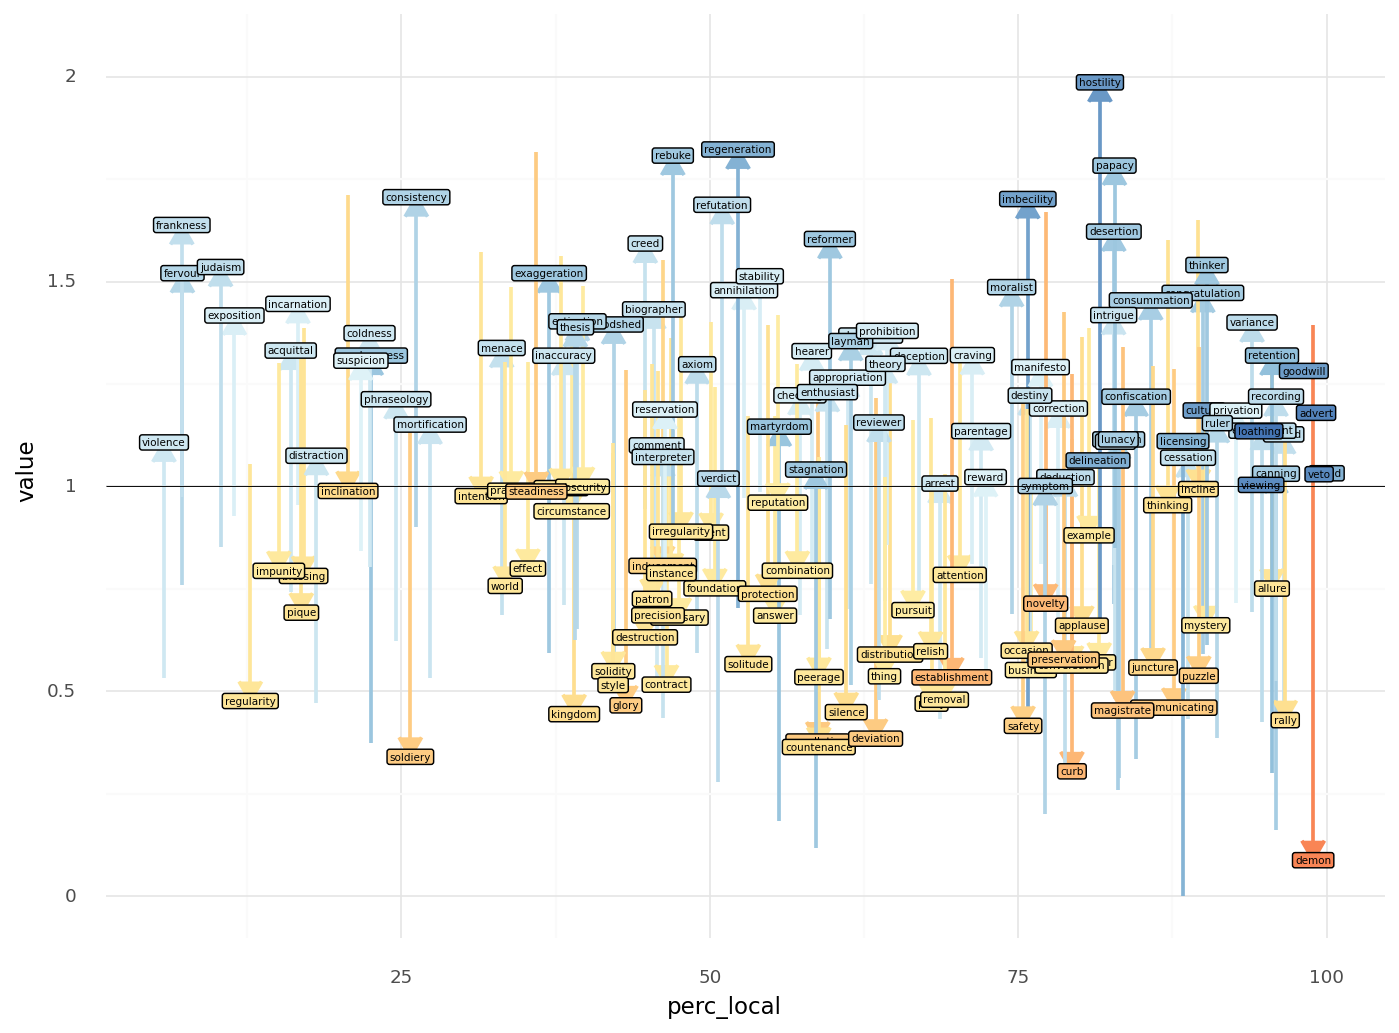

<ggplot: (8784621415793)>

In [17]:

p9.options.figure_size=11,8
fig=p9.ggplot(
    p9.aes(
        x='perc_local',
        y='value',
        label='word',
        fill='score_diff_abstractness',
#         color='score_diff_abstractness',
    ),
    data=figdf
)
fig+=p9.theme_minimal()
fig+=p9.geom_path(p9.aes(group='word', color='score_diff_abstractness'), arrow=p9.geoms.arrow(length=.15,type='closed'), size=1)
# fig+=p9.geom_label(size=3,data=figdf[figdf.variable.str.contains('1')])
fig+=p9.geom_label(size=5,data=figdf[figdf.variable.str.contains('2')])
# fig+=p9.geom_point(size=1,data=figdf[figdf.variable.str.contains('1')])
# fig+=p9.xlim(0,100)
# fig+=p9.ylim(-1.8,1.8)
# fig+=p9.ylim(-.75,2.25)
fig+=p9.ylim(0,2.05)
fig+=p9.scale_fill_distiller(type='div',direction=1,palette='RdYlBu',guide=None)
fig+=p9.scale_color_distiller(type='div',direction=1,palette='RdYlBu',guide=None)
fig+=p9.geom_hline(yintercept=1,size=0.25)
# fig+=p9.facet_wrap('class_abs',ncol=1)
fig

### Inspect

In [270]:
interact(get_word_info,w='frenchmen')

interactive(children=(Text(value='frenchmen', description='w'), Output()), _dom_classes=('widget-interact',))

<function __main__.get_word_info(w)>